In [118]:
import dlib
import cv2
face_detector = dlib.get_frontal_face_detector()
img = cv2.imread('./Dataset/face/hand2.jpg')
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
faces = face_detector(img)
size = 80

# print("{} faces are detected.".format(len(faces)))
for f in faces:
    print("left, top, right, bottom : ", f.left(), f.top(), f.right(), f.bottom())
    # cv2.rectangle(img, (f.left(), f.top()), (f.right(), f.bottom()), (0,0,255),2)
    cv2.rectangle(img, ((f.left()-size), (f.top()-size)), ((f.right()+size),(f.bottom()+size)), (0,0,255),2)

# win = dlib.image_window()
# win.set_image(img)
# win.add_overlay(faces)

crop = img[(f.top()-size):(f.bottom()+size), (f.left()-size):(f.right()+size)]
cv2.imwrite("output.jpg", crop, [cv2.IMWRITE_JPEG_QUALITY, 80])

left, top, right, bottom :  221 109 293 181


True

In [1]:
import dlib
import cv2
import glob
from PIL import Image

face_detector = dlib.get_frontal_face_detector()
crop_count = 0
data_path = './Dataset/Train/'

#데이터 로드
face_set = glob.glob('./Dataset/face/*.jpg')

# img = cv2.imread('./Dataset/face/hand1.jpg')
for i in range(len(face_set)):
    #사이즈 비율 정하기
    img = Image.open(face_set[i])
    width, height = img.size

    #이미지 데이터 1개씩 로드
    img = cv2.imread(face_set[i])
    img_area = width * height

    #얼굴 디텍트
    faces = face_detector(img,1)
    
    #디텍트 된 얼굴 수에 따른 반응 설정
    if len(faces) >= 1:
        print("얼굴 검출 성공 =>", face_set[i])
        for i in range(len(faces)):
            # print("left, top, right, bottom : ", f.left(), f.top(), f.right(), f.bottom())

            # 얼굴 크롭할 비율 정하기
            # width = abs(faces[i].left() - faces[i].right())
            # height = abs(faces[i].top() - faces[i].bottom())
            # area = width * height
            # # print('img_area',img_area)
            # # print('area',area)
            # # size = int((img_area/area)*3)
            size = 0

            crop = img[(faces[i].top()-size):(faces[i].bottom()+size), (faces[i].left()-size):(faces[i].right()+size)]
            file_name = str(crop_count)+".jpg"
            data_path_a = data_path + file_name
            #이미지 크기 조정
            crop = cv2.resize(crop, (440, 400), interpolation = cv2.INTER_CUBIC)
            cv2.imwrite(data_path_a, crop)
            crop_count += 1

    elif len(faces) == 0:
            print('얼굴 검출 실패 =>',face_set[i])
            pass
        
print(len(face_set),'장의 사진 중',crop_count,'개의 얼굴 검출, Crop 완료')



얼굴 검출 성공 => ./Dataset/face\apink1.jpg
얼굴 검출 성공 => ./Dataset/face\apink2.jpg
얼굴 검출 성공 => ./Dataset/face\golf.jpg
얼굴 검출 성공 => ./Dataset/face\hand1.jpg
얼굴 검출 성공 => ./Dataset/face\hand2.jpg
얼굴 검출 성공 => ./Dataset/face\kimgunwoo.jpg
얼굴 검출 실패 => ./Dataset/face\p1.jpg
얼굴 검출 성공 => ./Dataset/face\p2.jpg
얼굴 검출 성공 => ./Dataset/face\p3.jpg
9 장의 사진 중 14 개의 얼굴 검출, Crop 완료


In [106]:
a = cv2.imread('./Dataset/face/apink1.jpg')

In [78]:
img = cv2.imread(face_set[8])
faces = face_detector(img)
len(faces)

2

In [84]:
import dlib
import cv2
import glob
from PIL import Image, ImageOps
import numpy as np
import openface

face_detector = dlib.get_frontal_face_detector()
crop_count = 0
data_path = './Dataset/Train/'
predictor_path = './shape_predictor_68_face_landmarks.dat'
predictor = dlib.shape_predictor(predictor_path)

#데이터 로드
face_set = glob.glob('./Dataset/face/*.jpg')

for i in range(len(face_set)):
    #사이즈 비율 정하기
    img = Image.open(face_set[i])
    width, height = img.size

    #이미지 데이터 1개씩 로드
    img = cv2.imread(face_set[i])
    
    #얼굴 디텍트
    faces = face_detector(img,1)
    
    #디텍트 된 얼굴 수에 따른 반응 설정
    if len(faces) >= 1:
        print("얼굴 검출 성공 =>", face_set[i])
      
        # 인식된 얼굴 개수만큼 반복하여 얼굴 윤곽을 표시
        for k, d in enumerate(faces):
            # k 얼굴 인덱스
            # d 얼굴 좌표
            print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(k, d.left(), d.top(), d.right(), d.bottom()))

            shape = predictor(img, d)
            print("Part 0: {}, Part 1: {} ...".format(shape.part(0),shape.part(1)))

            #랜드마크 리스트 생성
            landmark_list = []

            #코에 빨강 찍기
            for p in shape.parts():
                landmark_list.append([p.x, p.y])
                if p.x == shape.parts()[30].x and p.y == shape.parts()[30].y:
                    cv2.circle(img, (p.x, p.y), 1, (0, 0, 255), -1)
                    face_center_x = shape.parts()[30].x
                    face_center_y = shape.parts()[30].y
                    nose = shape.parts()[30]
                else:
                    cv2.circle(img, (p.x, p.y), 1, (0, 255, 0), -1)
            #코 좌표 -> nose
            
            crop = img[(faces[i].top()-size):(faces[i].bottom()+size), (faces[i].left()-size):(faces[i].right()+size)]

            # alignedFace = face_aligner.align(532, img, d, landmarkIndices=openface.AlignDlib.INNER_EYES_AND_BOTTOM_LIP)    

            file_name = str(crop_count)+".jpg"
            data_path_a = data_path + file_name
            crop = cv2.resize(alignedFace, (440, 400), interpolation = cv2.INTER_AREA)

            cv2.imwrite(data_path_a, alignedFace)
            crop_count += 1

    elif len(faces) == 0:
            print('얼굴 검출 실패 =>',face_set[i])
            pass
    
print(len(face_set),'장의 사진 중',crop_count,'개의 얼굴 검출, Crop 완료')

얼굴 검출 성공 => ./Dataset/face\hand1.jpg
Detection 0: Left: 513 Top: 291 Right: 736 Bottom: 514
Part 0: (520, 357), Part 1: (524, 383) ...
1 장의 사진 중 1 개의 얼굴 검출, Crop 완료


In [86]:
point = (nose.x, nose.y)
type(point)

tuple

In [87]:
print(faces[0].top(),"top")
print(faces[0].bottom(),"bottom")
print(faces[0].right(),"right")
print(faces[0].left(),"left")

291 top
514 bottom
736 right
513 left


In [97]:
x = (faces[0].right() - faces[0].left()/2)
y = (faces[0].bottom() - faces[0].top()/2)
print(x, y)

479.5 368.5


In [103]:
nose.x - x

150.5

In [105]:
move_x = float(nose.x - x)
move_y = float(nose.y - y)

print(move_x , move_y)
cv2.rectangle(img, (384,0), (510,128), (0,255,0), 3)

150.5 21.5


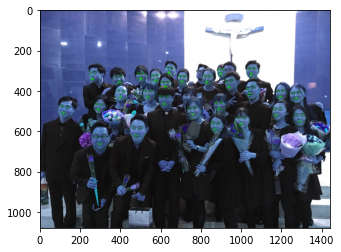

In [61]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import openface

height, width = img.shape[:2]
M = np.float32([[1, 0, 0], [0, 1, 0]]) # 이미지를 오른쪽으로 100, 아래로 25 이동시킵니다.

# 랜드마크를 이용해 얼굴을 정렬할 클래스 생성 - Openface
# 매개변수로 랜드마크 모델 
face_aligner = openface.AlignDlib('./shape_predictor_68_face_landmarks.dat')

img_translation = cv2.warpAffine(img, M, (width,height))
plt.imshow(img_translation)

In [32]:
    
'''	    
인식된 랜드마크를 openface를 이용해 변환
532 - imgDim
    이미지 크기 532는 532x532 이미지로 반환하겠다는 뜻 
image - rgbImg
    변환 시킬 원본 이미지 : (높이, 너비, 3)
face_rect - bb
    얼굴 위치 (rect)
landmarkIndices
    변환 대상의 인덱스.
    openface.AlignDlib.OUTER_EYES_AND_NOSE
        [36, 45, 33]
    openface.AlignDlib.INNER_EYES_AND_BOTTOM_LIP
        [39, 42, 57]
'''
alignedFace = face_aligner.align(532, img, d, landmarkIndices=openface.AlignDlib.OUTER_EYES_AND_NOSE)    
'''
alignedFace 는 RGB(ndarray) 이미지      
'''

    # aligned_face_x.jpg 로 저장 
cv2.imwrite("aligned_face_{}.jpg".format(i), alignedFace)

True